# Age and Gender Detection
### Complete # TODO

# Requirements

In [1]:
import cv2
import time
import numpy as np
import os
import matplotlib.pyplot as plt

# Camera Test

In [2]:
def visualize_fps(image, fps: int):
    if len(np.shape(image)) < 3:
        text_color = (255, 255, 255)
    else:
        text_color = (0, 255, 0)  

    row_size = 20 
    left_margin = 24 

    font_size = 1
    font_thickness = 2

    fps_text = "FPS = {:.1f}".format(fps)
    text_location = (left_margin, row_size)
    
    cv2.putText(
        image,
        fps_text,
        text_location,
        cv2.FONT_HERSHEY_PLAIN,
        font_size,
        text_color,
        font_thickness,
    )

    return image


This Python function visualize_fps overlays the calculated frames per second (FPS) onto an input image. It determines text color based on image dimensions (grayscale vs. color). It then formats the FPS as text and uses OpenCV's putText to draw it at a specified location on the image, finally returning the modified image.







In [3]:
CAMERA_DEVICE_ID = 0  
IMAGE_WIDTH = 800 
IMAGE_HEIGHT = 600  
fps = 0  

if __name__ == "__main__":  
    try:
        cap = cv2.VideoCapture(CAMERA_DEVICE_ID) 
        while True:
            start_time = time.time()  
            _, frame = cap.read()  
            frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))  
            cv2.imshow("frame", visualize_fps(frame, fps)) 

            end_time = time.time()  

            seconds = end_time - start_time 
            fps = 1.0 / seconds

            if cv2.waitKey(33) == 27:  
                break
    except Exception as e: 
        print(e) 
    finally:
        cv2.destroyAllWindows()  
        cap.release()  


KeyboardInterrupt: 

This Python script uses OpenCV to capture video from a camera.
It initializes the camera (device ID 0) and sets image dimensions.
The script then enters a loop, continuously reading frames from the camera.
Each frame is resized and displayed with the calculated frames per second (FPS).
Pressing the 'ESC' key (ASCII 27) breaks the loop, closes windows, and releases the camera.



# Loading Video

In [4]:
CAMERA_DEVICE_ID = os.path.join("videos", "Einstein_2.mp4") 
IMAGE_WIDTH = 1000  
IMAGE_HEIGHT = 600
fps = 0  
FRAME_RATE = 30  
DURATION = 1 / FRAME_RATE

if __name__ == "__main__":  
    try:
        cap = cv2.VideoCapture(CAMERA_DEVICE_ID)  

        while True:  
            start_time = time.time() 

            _, frame = cap.read()  
            frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))  

            end_time = time.time() 

            seconds = end_time - start_time

            if seconds < DURATION:
                time.sleep(DURATION - seconds)

            seconds = time.time() - start_time
            fps = 1.0 / seconds

            cv2.imshow("frame", visualize_fps(frame, fps))

            if cv2.waitKey(33) == 27:  
                break
    except Exception as e: 
        print(e)  
    finally:
        cv2.destroyAllWindows()  
        cap.release()


KeyboardInterrupt: 

This Python script uses OpenCV to play and display a video file.
It specifies the video path ("videos/Einstein_2.mp4"), and desired display dimensions.
The script aims for a target frame rate (FRAME_RATE = 30), calculating the duration for each frame.
In a loop, it reads, resizes, and shows frames, pausing if processing is faster than the target frame rate.
Pressing 'ESC' quits, closing windows and releasing the video file.



# Loading Models

In [5]:
print("--- Initializing Model Paths ---")
models_dir = os.path.join( "models")

faceProto = os.path.join(models_dir, "opencv_face_detector.pbtxt")
faceModel = os.path.join(models_dir, "opencv_face_detector_uint8.pb")
ageProto = os.path.join(models_dir, "age_deploy.prototxt")
ageModel = os.path.join(models_dir, "age_net.caffemodel")
genderProto = os.path.join(models_dir, "gender_deploy.prototxt")
genderModel = os.path.join(models_dir, "gender_net.caffemodel")

faceNet = None
ageNet = None
genderNet = None

print("\n--- Checking and Loading Face Detection Model ---")
print(f"  Framework Protoxt Path: {faceProto}")
print(f"  Model Weights Path:     {faceModel}")
print(f"  Protoxt File Exists:    {os.path.exists(faceProto)}")
print(f"  Model File Exists:      {os.path.exists(faceModel)}")

if not os.path.exists(faceProto) or not os.path.exists(faceModel):
    print("FATAL ERROR: Face detection model file(s) not found. Please ensure they are in the 'models' directory relative to your script.")
    print(f"Expected models directory: {models_dir}")
    sys.exit("Exiting due to missing face detection model files.") 
else:
    try:
        print("Attempting to load faceNet...")
        faceNet = cv2.dnn.readNet(faceModel, faceProto)
        if faceNet.empty():
            print("FATAL ERROR: cv2.dnn.readNet loaded faceNet but it is empty. The model files might be corrupted or incompatible.")
            faceNet = None
        else:
            print("SUCCESS: faceNet loaded successfully.")
    except cv2.error as e:
        print(f"OpenCV Error loading faceNet: {e}")
        faceNet = None
    except Exception as e:
        print(f"An unexpected error occurred loading faceNet: {e}")
        faceNet = None

    if faceNet is None:
        sys.exit("Exiting because faceNet could not be loaded.") 

if faceNet is not None: 
    print("\n--- Checking and Loading Age Detection Model ---")

    if os.path.exists(ageProto) and os.path.exists(ageModel):
        try:
            ageNet = cv2.dnn.readNet(ageModel, ageProto)
            if ageNet.empty(): ageNet = None; print("Error: ageNet empty.")
            else: print("ageNet loaded.")
        except Exception as e: ageNet = None; print(f"Error loading ageNet: {e}")
    else: print("Age model files not found.")


    print("\n--- Checking and Loading Gender Detection Model ---")

    if os.path.exists(genderProto) and os.path.exists(genderModel):
        try:
            genderNet = cv2.dnn.readNet(genderModel, genderProto)
            if genderNet.empty(): genderNet = None; print("Error: genderNet empty.")
            else: print("genderNet loaded.")
        except Exception as e: genderNet = None; print(f"Error loading genderNet: {e}")
    else: print("Gender model files not found.")


MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)

ageList = [
    "(0-2)",
    "(4-6)",
    "(8-12)",
    "(15-20)",
    "(25-32)",
    "(38-43)",
    "(48-53)",
    "(60-100)",
]

genderList = ["Male", "Female"]



--- Initializing Model Paths ---

--- Checking and Loading Face Detection Model ---
  Framework Protoxt Path: models/opencv_face_detector.pbtxt
  Model Weights Path:     models/opencv_face_detector_uint8.pb
  Protoxt File Exists:    True
  Model File Exists:      True
Attempting to load faceNet...
SUCCESS: faceNet loaded successfully.

--- Checking and Loading Age Detection Model ---
ageNet loaded.

--- Checking and Loading Gender Detection Model ---
genderNet loaded.


This Python script initializes paths and attempts to load pre-trained deep learning models.
It's designed for face detection, age estimation, and gender classification using OpenCV.
The script first defines file paths for model configuration and weight files within a "models" directory.
It then sequentially checks for and loads the face detection model, exiting if unsuccessful, followed by age and gender models.
Finally, it defines mean values for model input normalization and lists for age and gender categories.

# Detect Age and Gender in a Frame

In [6]:
def highlightFace(net, frame, conf_threshold=0.7):
    frameOpencvDNN = frame.copy()
    frameHeight = frameOpencvDNN.shape[0]
    frameWidth = frameOpencvDNN.shape[1]
    blob = cv2.dnn.blobFromImage(
        frameOpencvDNN, 1.0, (300, 300), [104, 117, 123], True, False
    )

    net.setInput(blob)
    detections = net.forward()
    faceBoxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            faceBoxes.append([x1, y1, x2, y2])
            cv2.rectangle(frameOpencvDNN, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight / 150)), 8)
    return frameOpencvDNN, faceBoxes


This Python function, `highlightFace`, uses a deep learning network (`net`) to detect faces in an image (`frame`).
It preprocesses the input frame into a `blob` suitable for the neural network.
The network performs a forward pass to get `detections`, and filters them by a `conf_threshold`.
For each confident detection, it calculates bounding box coordinates and draws a rectangle on a copy of the frame.
The function returns the frame with highlighted faces and a list of the bounding boxes.

In [7]:
def detect_face_age_gender(input_frame, padding=20):
    resultImg, faceBoxes = highlightFace(faceNet, input_frame.copy()) 
    if not faceBoxes:
        return resultImg 

    for faceBox in faceBoxes:
        face = input_frame[
            max(0, faceBox[1] - padding) : min(
                faceBox[3] + padding, input_frame.shape[0] - 1
            ),
            max(0, faceBox[0] - padding) : min(
                faceBox[2] + padding, input_frame.shape[1] - 1
            ),
        ]
        
        if face.size == 0:
            continue

        blob = cv2.dnn.blobFromImage(
            face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False
        )
        
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]

        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]
        
        cv2.putText(resultImg, f'{gender}, {age}', (faceBox[0], faceBox[1] - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv2.LINE_AA)
    return resultImg


This Python function, `detect_face_age_gender`, processes an `input_frame` to identify faces and then predict their gender and age.
It first calls `highlightFace` to get face bounding boxes and a frame with faces marked.
For each detected `faceBox`, it extracts the face region, applying optional `padding`.
This extracted face is then fed into pre-loaded `genderNet` and `ageNet` to predict gender and age.
Finally, it annotates the `resultImg` with the predicted gender and age for each detected face and returns it.

# Age and Gender Detection on Image

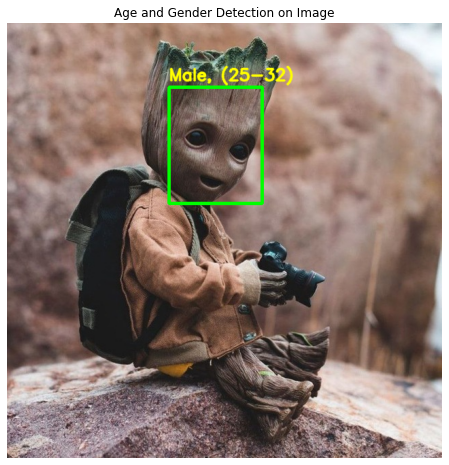

Exiting single image age/gender detection.


In [8]:
IMAGE_FILE_FOR_DETECTION = os.path.join("images", "photo_1.jpeg")
if os.path.exists(IMAGE_FILE_FOR_DETECTION):
    image_to_detect = cv2.imread(IMAGE_FILE_FOR_DETECTION)
    if image_to_detect is None:
        print(f"Error loading image: {IMAGE_FILE_FOR_DETECTION}")
    else:
        result_image = detect_face_age_gender(image_to_detect)
        
        plt.figure(figsize=(10,8))
        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.title("Age and Gender Detection on Image")
        plt.axis('off')
        plt.show()
else:
    print(f"Image file not found: {IMAGE_FILE_FOR_DETECTION}")
print("Exiting single image age/gender detection.")


CAMERA_DEVICE_ID_AG = 0
IMAGE_WIDTH_CAM_AG = 800
IMAGE_HEIGHT_CAM_AG = 600
fps_cam_ag = 0


This code first attempts to detect faces, age, and gender in a static image file.
It defines the path to an image (`photo_1.jpeg` in an "images" folder).
If the image exists and loads correctly, it processes it using the `detect_face_age_gender` function.
The resulting image, with detected attributes, is then displayed using Matplotlib.
Separately, it initializes constants for a camera setup (device ID, image width/height, FPS) but doesn't use them here.

## Age Detection Using Webcam

In [ ]:
CAMERA_DEVICE_ID_AG = 0
IMAGE_WIDTH_CAM_AG = 800
IMAGE_HEIGHT_CAM_AG = 600
fps_cam_ag = 0

if __name__ == "__main__":
    print("Running camera age/gender detection block...")
    cap_cam_ag = None
    try:
        cap_cam_ag = cv2.VideoCapture(CAMERA_DEVICE_ID_AG)

        while True:
            start_time_cam_ag = time.time()

            hasFrame_cam_ag, frame_cam_ag = cap_cam_ag.read()
            if not hasFrame_cam_ag or frame_cam_ag is None:
                print("Error reading frame from camera or camera disconnected.")
                cv2.waitKey(0)
                break

            frame_cam_ag_resized = cv2.resize(frame_cam_ag, (IMAGE_WIDTH_CAM_AG, IMAGE_HEIGHT_CAM_AG))
            
            resultImg_cam_ag = detect_face_age_gender(frame_cam_ag_resized)

            cv2.imshow("Detecting age and gender (Camera)", visualize_fps(resultImg_cam_ag, fps_cam_ag))

            end_time_cam_ag = time.time()
            seconds_cam_ag = end_time_cam_ag - start_time_cam_ag
            if seconds_cam_ag > 0:
                fps_cam_ag = 1.0 / seconds_cam_ag

            if cv2.waitKey(33) == 27: 
                break
    except Exception as e:
        print(f"Exception in camera age/gender detection block: {e}")
    finally:
        if cap_cam_ag is not None and cap_cam_ag.isOpened():
            cap_cam_ag.release()
        cv2.destroyAllWindows()
    print("Exiting camera age/gender detection block.")



Running camera age/gender detection block...


KeyboardInterrupt: 

: 

This Python script performs real-time face, age, and gender detection using a camera.
It initializes a video capture object for the specified camera device ID and sets frame dimensions.
In a continuous loop, it reads frames from the camera, and resizes them.
Each frame is then processed by the `detect_face_age_gender` function, and the result is displayed with an FPS counter.
The loop breaks on an 'ESC' key press, releasing the camera and destroying OpenCV windows.

## Age and Gender Detection Using Video

In [ ]:
VIDEO_PATH_AG = os.path.join("videos", "Jobs_2.mp4")
IMAGE_WIDTH_VID_AG = 1000
IMAGE_HEIGHT_VID_AG = 600
fps_vid_ag = 0
FRAME_RATE_VID_AG = 30 
DURATION_VID_AG = 1 / FRAME_RATE_VID_AG

if __name__ == "__main__":
    print("Running video age/gender detection block...")
    cap_vid_ag = None
    try:
        if not os.path.exists(VIDEO_PATH_AG):
            print(f"Video file not found: {VIDEO_PATH_AG}")
        else:
            cap_vid_ag = cv2.VideoCapture(VIDEO_PATH_AG)
            if not cap_vid_ag.isOpened():
                print(f"Error opening video file: {VIDEO_PATH_AG}")
            else:
                while True:
                    start_time_vid_ag = time.time()

                    hasFrame_vid_ag, frame_vid_ag = cap_vid_ag.read()

                    if not hasFrame_vid_ag:
                        print("Video ended or error reading frame.")
                        break 

                    frame_vid_ag_resized = cv2.resize(frame_vid_ag, (IMAGE_WIDTH_VID_AG, IMAGE_HEIGHT_VID_AG))
                    
                    resultImg_vid_ag = detect_face_age_gender(frame_vid_ag_resized)

                    end_time_vid_ag_proc = time.time()
                    seconds_proc_vid_ag = end_time_vid_ag_proc - start_time_vid_ag

                    if seconds_proc_vid_ag < DURATION_VID_AG:
                        time.sleep(DURATION_VID_AG - seconds_proc_vid_ag)
                    
                    final_total_seconds_vid_ag = time.time() - start_time_vid_ag
                    if final_total_seconds_vid_ag > 0:
                        fps_vid_ag = 1.0 / final_total_seconds_vid_ag
                    
                    cv2.imshow("Detecting age and gender (Video)", visualize_fps(resultImg_vid_ag, fps_vid_ag))

                    if cv2.waitKey(33) == 27:
                        break
    except Exception as e:
        print(f"Exception in video age/gender detection block: {e}")
    finally:
        if cap_vid_ag is not None and cap_vid_ag.isOpened():
            cap_vid_ag.release()
        cv2.destroyAllWindows()
    print("Exiting video age/gender detection block.")

print("Script finished.")


Running video age/gender detection block...
Exception in video age/gender detection block: 'NoneType' object has no attribute 'setInput'
Exiting video age/gender detection block.
Script finished.


This Python script processes a video file to detect faces, age, and gender.
It initializes by setting the video path, display dimensions, and a target frame rate.
The script reads frames from the video, resizes them, and applies the `detect_face_age_gender` function.
It includes logic to synchronize playback to the target frame rate by pausing if processing is too fast, then displays the annotated frame with FPS.
The process stops if the 'ESC' key is pressed or the video ends, followed by cleanup.